In [14]:
# import sys
# sys.path.append("..")
# from common_utils import DATA_HOME
import numpy as np
from numpy import linspace
from svm import *
import matplotlib.pyplot as plt

# dataset = "playground-series-s4e2"


In [19]:
# target function 
W = 3.65
B = -0.6

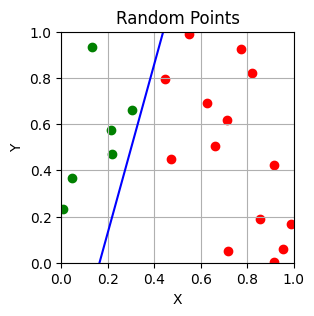

In [20]:
# Generate random points
num_points = 20
x = np.random.rand(num_points)
y = np.random.rand(num_points)
labels = []

# label the data points
for i in range(num_points):
    yhat = x[i] * W + B
    labels.append(True) if yhat > y[i] else labels.append(False)

# Set figure size
plt.figure(figsize=(3, 3))  

# Plot the line
x_line = np.linspace(0, 1, 100)
plt.plot(x_line, x_line * W + B, color='blue', label='wx + b')

# Plot the data points with colors corresponding to their labels
for i in range(num_points):
    color = 'red' if labels[i] else 'green'
    plt.scatter(x[i], y[i], color=color)

# Plot the points
plt.title('Random Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.show()